In [187]:
#importing  important libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import GridSearchCV

In [188]:
#loading the Data
df=pd.read_csv("Data file.csv")

In [189]:
#since there are a lot of columns, we use set_option to see them all
pd.set_option('display.max_columns', None)
df

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  \
0         220.13    260.13                2.0                0.0   
1        3691.26   3691.26               20.0                0.0   
2         900.13    900.13                3.0                0.0   
3         159.42    159.42               41.0                0.0   
4        1098.90   1098.90                4.0                0.0   
...          ...       ...                ...                ...   
209588   1089.19   1089.19                1.0                0.0   
209589   1728.36   1728.36                4.0                0.0   
209590   5861.83   8893.20                3.0                0.0   
209591    411.83    984.58                2.0               38.0   
209592    483.92    631.20               13.0                0.0   

        last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  \
0                   1539              2          21.0             3078.0   
1                   5787              1           0.0             5787.0   
2                   1539              1           0.0             1539.0   
3                    947              0           0.0                0.0   
4                   2309              7           2.0            20029.0   
...                  ...            ...           ...                ...   
209588              4048              3           2.0            10404.0   
209589               773              4           1.0             3092.0   
209590              1539              5           8.0             9334.0   
209591               773              5           4.0            12154.0   
209592              7526              2           1.0             9065.0   

        medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
0                     1539.0                  7.50              2   
1                     5787.0                 61.04              1   
2                     1539.0                 66.32              1   
3                        0.0                  0.00              1   
4                     2309.0                 29.00              8   
...                      ...                   ...            ...   
209588                3178.0                 91.81              3   
209589                 773.0                161.30              6   
209590                1539.0                 51.13             11   
209591                 773.0                164.00              6   
209592                4532.5                356.70              3   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0                 21               3078                1539.0   
1                  0               5787                5787.0   
2                  0               1539                1539.0   
3                  0                947                 947.0   
4                  2              23496                2888.0   
...              ...                ...                   ...   
209588             2              10404                31

In [190]:
#exploring data
df.shape

(209593, 37)

In [191]:
#the data has 209593 rows and 37 columns

In [192]:
#Checking for null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [193]:
#The data set hai no null values

In [194]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [195]:
#the data set has colmuns of float64, int64 and object type

In [196]:
#The column Unnamed: 0,pcircle,pdate,msisdn has no purpose as teh first one is serial number the second one is the name of opertator as there is only one operator and the 3rd one is date.
#so froping these columns

In [197]:
df.drop(["Unnamed: 0","pcircle","pdate","msisdn"], axis=1, inplace=True)

In [198]:
 df

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5787.0   
2                0.0             1539.0                1539.0   
3                0.0                0.0                   0.0   
4                2.0            20029.0                2309.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           1.0             3092.0                 773.0   
209590           8.0             9334.0                1539.0   
209591           4.0            12154.0                 773.0   
209592           1.0             9065.0                4532.5   

        medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                       7.50              2            21               3078   
1                      61.04              1             0               5787   
2                      66.32              1             0               1539   
3                       0.00              1             0                947   
4                      29.00              8             2              23496   
...                      ...            ...           ...                ...   
209588                 91.81              3             2              10404   
209589                161.30              6             2               4038   
209590                 51.13             11             5              18592   
209591                164.00              6             4              17941   
209592                356.70              3            19              16591   

        medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                     1539.0                  7.50            0.0   
1                     5787.0                 61.04            0.0   
2                     1539.0                 66.32            0.0   
3                      947.0                  2.50            0.0   
4                     2888.0                 35.00            0.0   
..

In [199]:
#checking the distribution of the dependent variable="label"

<AxesSubplot:xlabel='label', ylabel='count'>

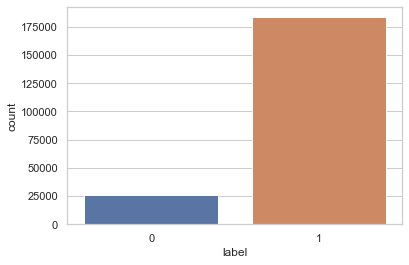

In [200]:
sns.countplot(x="label", data= df)

In [201]:
# the dependent variable is highly unbalance

In [202]:
#EDA

In [203]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30   fr_ma_rech30  sumamnt_ma_rech30  \
count     209593.000000  209593.000000  209593.000000      209593.000000   
mean        2064.452797       3.978057    3737.355121        7704.501157   
std         2370.786034       4.256090   53643.625172       10139.621714   
min            0.000000       0.000000       0.000000           0.000000   
25%          770.000000       1.000000       0.000000        1540.000000   
50%         1539.000000       3.000000       2.000000        4628.000000   
75%         2309.000000       5.000000       6.000000       10010.000000   
max        55000.000000     203.000000  999606.368132      810096.000000   

       medianamnt_ma_rech30  medianmarechprebal30  cnt_ma_rech90  \
count         209593.000000         209593.000000   209593.00000   
mean            1812.817952           3851.927942        6.31543   
std             2070.864620          54006.374433        7.19347   
min                0.000000           -200.000000        0.00000   
25%              770.000000             11.000000        2.00000   
50%             1539.000000             33.900000        4.00000   
75%             1924.000000             83.000000        8.00000   
max            55000.000000         999479.419319      336.00000   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
count  209593.000000      209593.000000         209593.000000   
mean        7.716780       12396.218352           1864.595821   
std        12.590251       16857.793882           2081.680664   
min         0.000000           0.000000              0.000000   
25%         0.000000        2317.000000            773.000000   
50%         2.000000        7226.000000           1539.000000   
75%         8.000000       16000.000000           1924.000000   
max        88.000000      953036.000000          55000.000000   

       medianmarechprebal90  cnt_da_rech30   fr_da_rech30  cnt_da_rech90  \
count         209593.000000  209593.000000  209593.000000  209593.000000   
mean              92.025541     262.578110    3749.494447       0.041495   
std              369.215658    4183.897978   53885.414979       0.397556   
min             -200.000000       0.000000       0.000000       0.000000   
25%               14.600000       0.000000       0.000000       0.000000   
50%               36.000000       0.000000       0.000000       0.000000   
75%               79.310000       0.000000       0.000000       0.000000   
max            41456.500000   99914.441420  999809.240107      38.000000   

        fr_da_rech90    cnt_loans30   amnt_loans30  maxamnt_loans30  \
count  209593.000000  209593.000000  209593.000000    20959

In [204]:
#IN majority of the column there is negative values. which is not possible with this data set
#There are huge differnece between the 75 percentile and the max value. which implies there are alot of outliers
#Except label in all variables the mean is greater than median. which implies the data is Right skewed


In [205]:
#Ploting graph

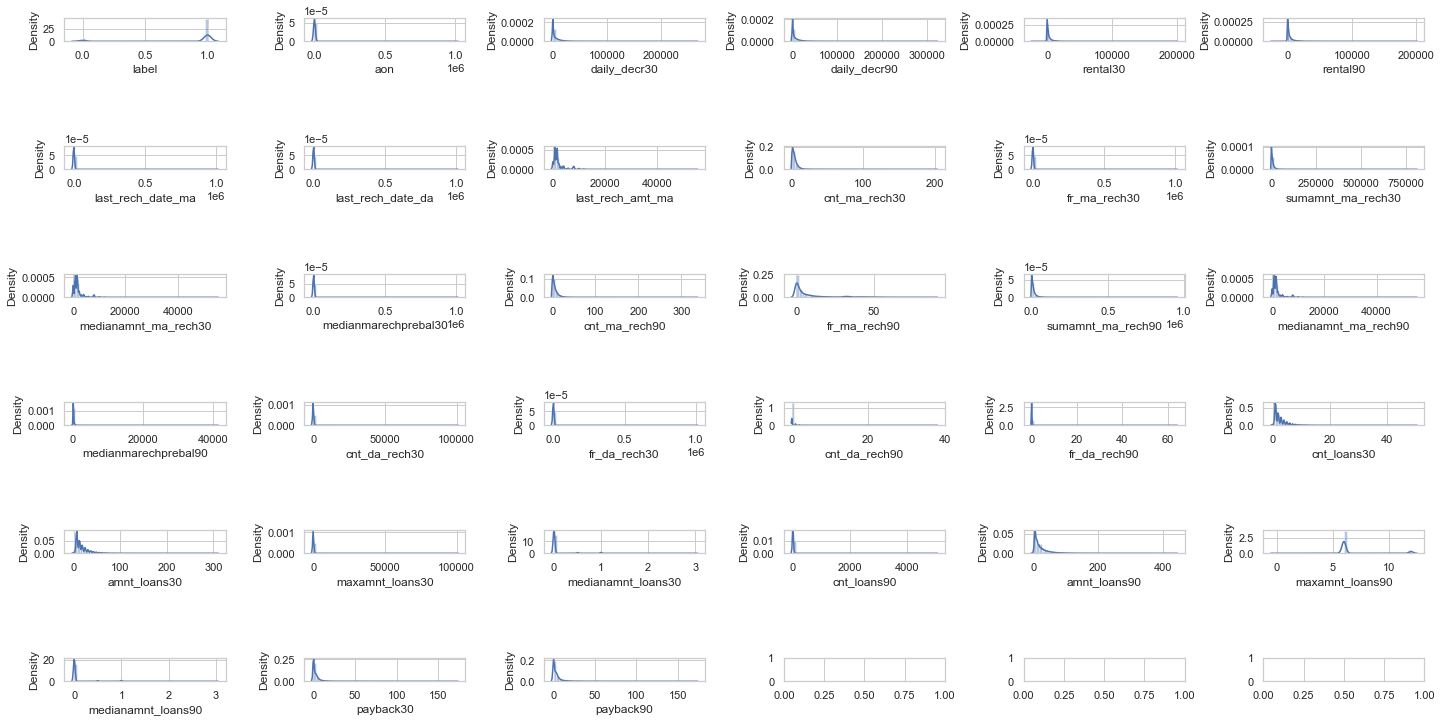

In [206]:
fig, ax=plt.subplots(ncols=6,nrows=6, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.distplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [207]:
# the variables are highli positive skewed

In [208]:
#Bivariate analysis

In [209]:
#making a Barplot function
def barplot(variable):
    sns.barplot(x="label", y=variable, data=df)

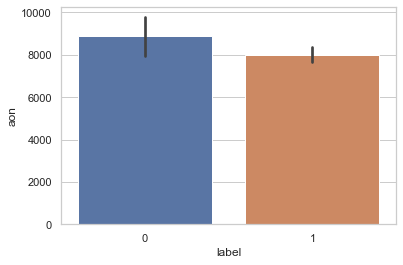

In [210]:
# aon/label plot
barplot("aon")

In [211]:
#loosely correlated

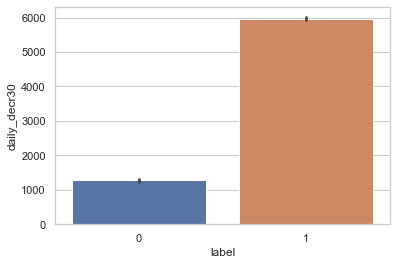

In [212]:
# daily_decr30/label plot
barplot("daily_decr30")

In [213]:
##highly corelated

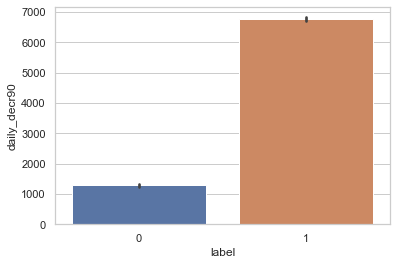

In [214]:
# daily_decr90/label plot
barplot('daily_decr90')

In [215]:
#highly corelated

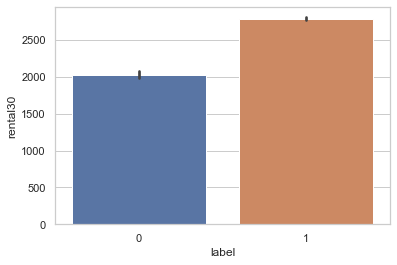

In [216]:
# rental30/label plot
barplot('rental30')

In [217]:
# somewhere correlated

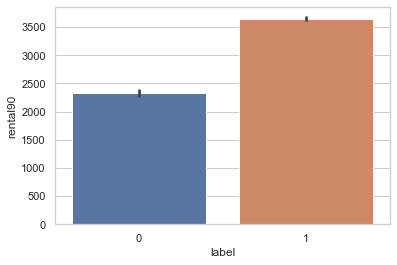

In [218]:
# rental90/label plot
barplot('rental90')

In [219]:
# somewhere correlated

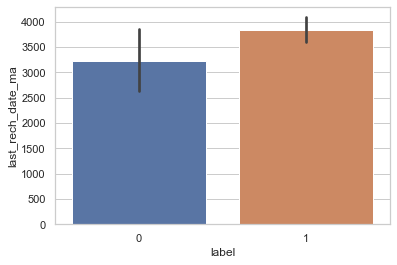

In [220]:
# last_rech_date_ma/label plot
barplot('last_rech_date_ma')

In [221]:
#less corelated

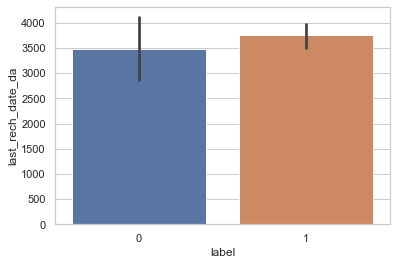

In [222]:
# last_rech_date_da/label plot
barplot('last_rech_date_da')

In [223]:
#lossely corelated

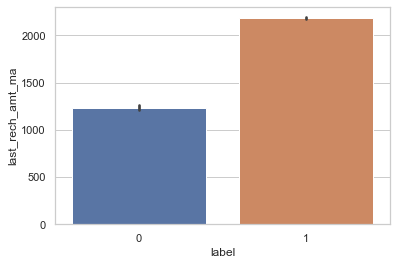

In [224]:
# last_rech_amt_ma/label plot
barplot('last_rech_amt_ma')

In [225]:
#cnt_ma_rech30 /label plot
barplot('cnt_ma_rech30')

In [226]:
#highly corelated

In [227]:
# fr_ma_rech30/label plot
barplot('fr_ma_rech30')

In [228]:
#lossely corlated

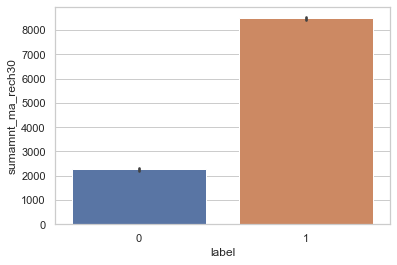

In [229]:
# sumamnt_ma_rech30/label plot
barplot("sumamnt_ma_rech30")

In [230]:
#highly corelated

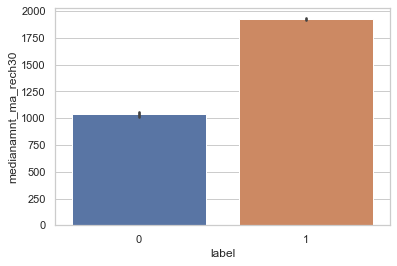

In [231]:
# medianamnt_ma_rech30/label plot
barplot("medianamnt_ma_rech30")

In [232]:
#highly corelated

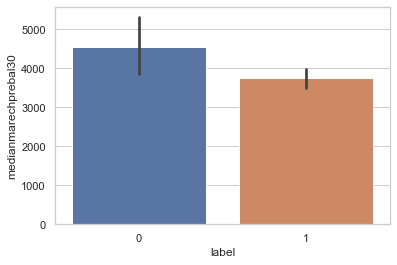

In [233]:
# medianmarechprebal30/label plot
barplot('medianmarechprebal30')

In [234]:
#moderately correlated

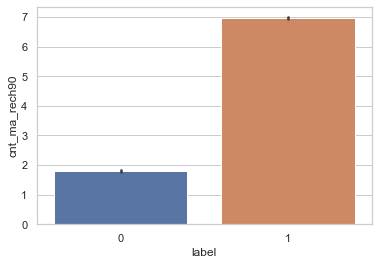

In [235]:
# cnt_ma_rech90/label plot
barplot('cnt_ma_rech90')

In [236]:
#highly corelated

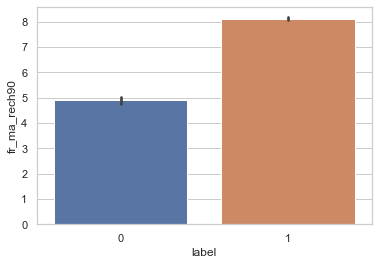

In [237]:
# fr_ma_rech90/label plot
barplot('fr_ma_rech90')

In [238]:
#highly corelated

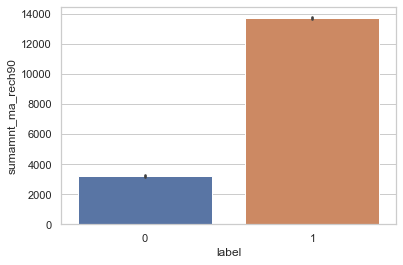

In [239]:
# sumamnt_ma_rech90/label plot
barplot('sumamnt_ma_rech90')

In [240]:
#highly corelated

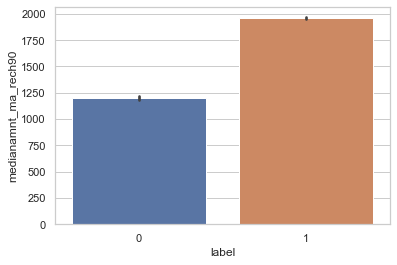

In [241]:
# medianamnt_ma_rech90/label plot
barplot('medianamnt_ma_rech90')

In [242]:
#highly corelated

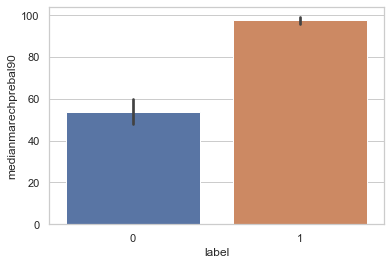

In [243]:
# medianmarechprebal90/label plot
barplot('medianmarechprebal90')

In [244]:
#highly corelated

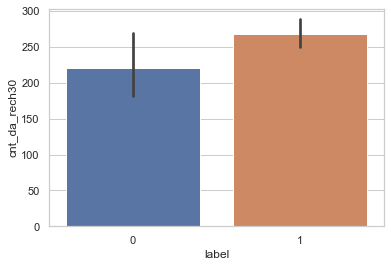

In [245]:
# cnt_da_rech30/label plot
barplot('cnt_da_rech30')

In [246]:
#lossely correlated

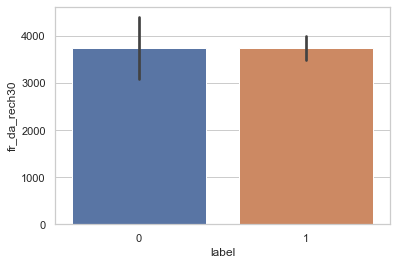

In [247]:
# fr_da_rech30/label plot
barplot('fr_da_rech30')

In [248]:
#lossely correlated

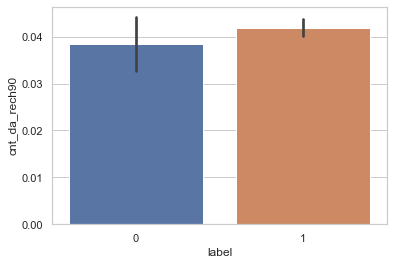

In [249]:
# cnt_da_rech90/label plot
barplot('cnt_da_rech90')

In [250]:
#lossely correlated

In [251]:
# fr_da_rech90/label plot
barplot('fr_da_rech90')

In [252]:
#moderately correlated

In [253]:
# cnt_loans30/label plot
barplot('cnt_loans30')

In [254]:
#highly corelated

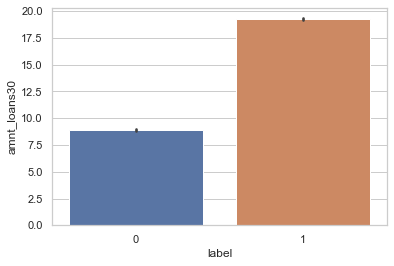

In [255]:
# amnt_loans30/label plot
barplot('amnt_loans30')

In [256]:
#highly corelated

In [257]:
# maxamnt_loans30/label plot
barplot('maxamnt_loans30')

In [258]:
#lossely correlated

In [259]:
# medianamnt_loans30/label plot
barplot('medianamnt_loans30')

In [260]:
#highly corelated

In [261]:
# cnt_loans90/label plot
barplot('cnt_loans90')

In [262]:
#moderately correlated

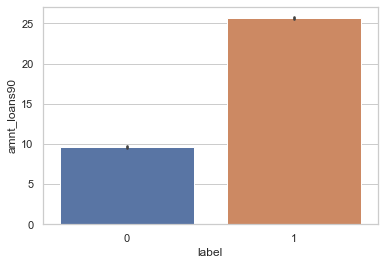

In [263]:
# amnt_loans90/label plot
barplot('amnt_loans90')

In [264]:
#highly corelated

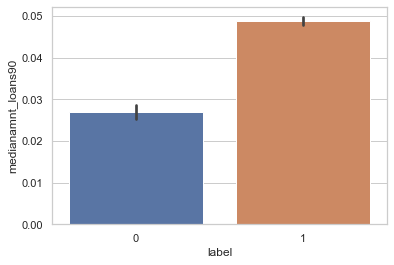

In [265]:
# medianamnt_loans90/label plot
barplot("medianamnt_loans90")

In [266]:
#highly corelated

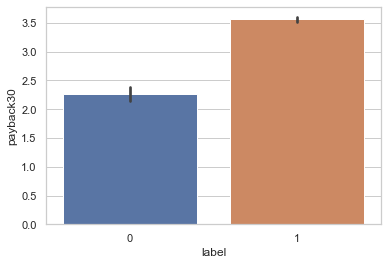

In [267]:
# payback30/label plot
barplot("payback30")

In [268]:
#highly corelated

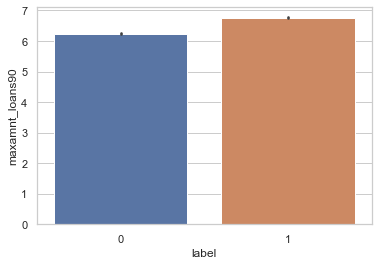

In [269]:
# maxamnt_loans90/label plot
barplot("maxamnt_loans90")

In [270]:
#lossely correlated

In [271]:
# payback90/label plot
barplot("payback90")

In [272]:
#highly corelated

In [273]:
#creating coorelation variable
cor=df.corr()

<AxesSubplot:>

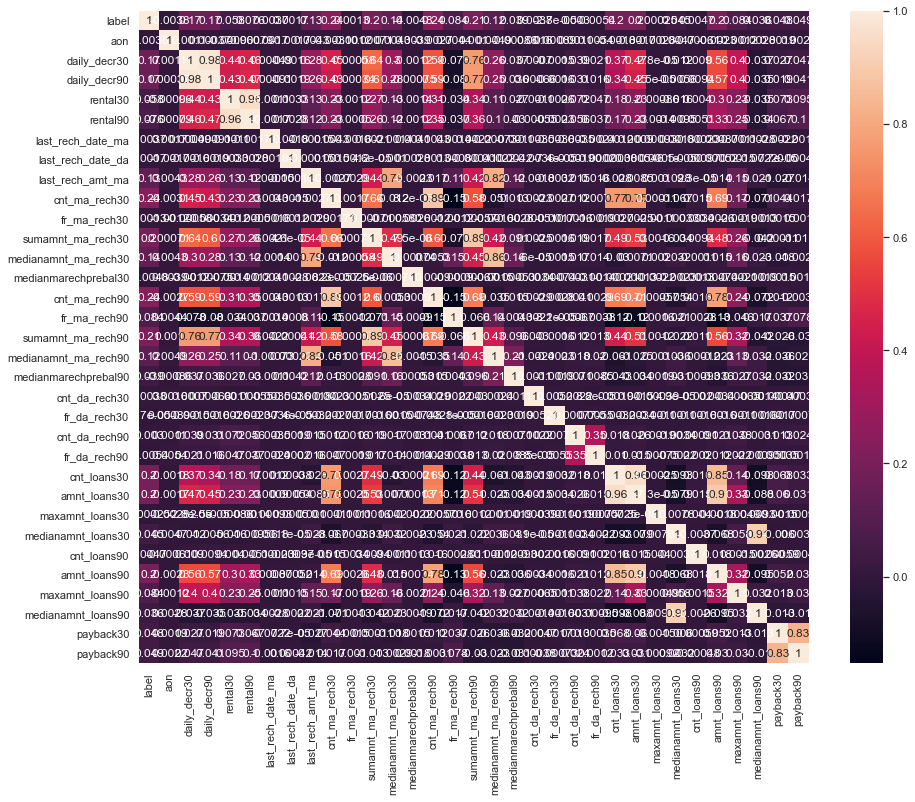

In [274]:
#using Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(cor,annot=True)

In [275]:
#as there are to many variables, so accending order with respect to label is used here  
df.corr()["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech30           -0.000027
aon       

In [276]:
#droping values which are bery less correlated to label
df.drop(["cnt_loans90","cnt_da_rech30","last_rech_date_ma","cnt_da_rech90","last_rech_date_da","fr_ma_rech30","maxamnt_loans30","fr_da_rech30","aon","medianmarechprebal30","fr_da_rech90"],axis=1,inplace=True)

In [277]:
# checking shape
df.shape

(209593, 22)

In [278]:
#There are 209593 rows an 22 columns left

In [279]:
#craeting a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(15,6))
    sns.set(style = "whitegrid")
    sns.distplot(data_frame[feature_name],kde=True)

In [280]:
#As there are huge outliers, IQR3 method use 

In [281]:
#function to apply IQR3
#Also there can be no negative value so the lower bridge is replaced with 25th percentile for the number =<0
def outlier_IQR3(data_frame,feature_name):
    histogram(data_frame,feature_name)
    IQR = data_frame[feature_name].quantile(0.75)-data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25)
    upper_bridge = data_frame[feature_name].quantile(0.75)+(IQR*3)
    df.loc[data_frame[feature_name]>=upper_bridge,feature_name]=upper_bridge
    df.loc[data_frame[feature_name]<=0,feature_name]=lower_bridge
    histogram(data_frame,feature_name)

In [282]:
#daily_decr30
outlier_IQR3(df,"daily_decr30")

In [283]:
#outlier_IQR3(df,"aon")

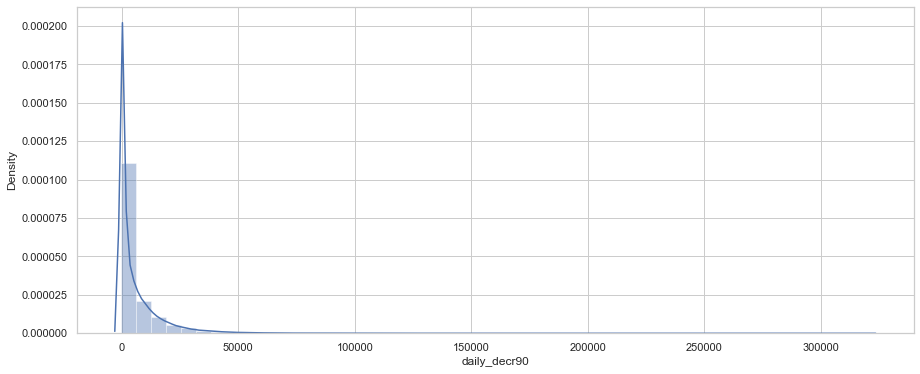

In [284]:
#daily_decr90
outlier_IQR3(df,"daily_decr90")

In [285]:
#rental30
outlier_IQR3(df,"rental30")

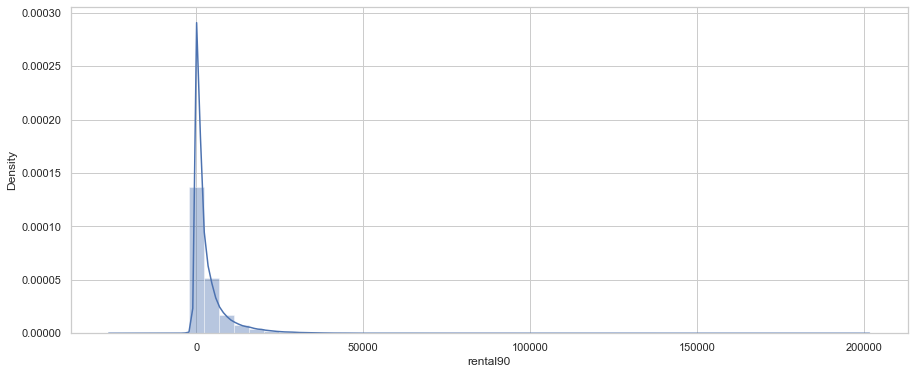

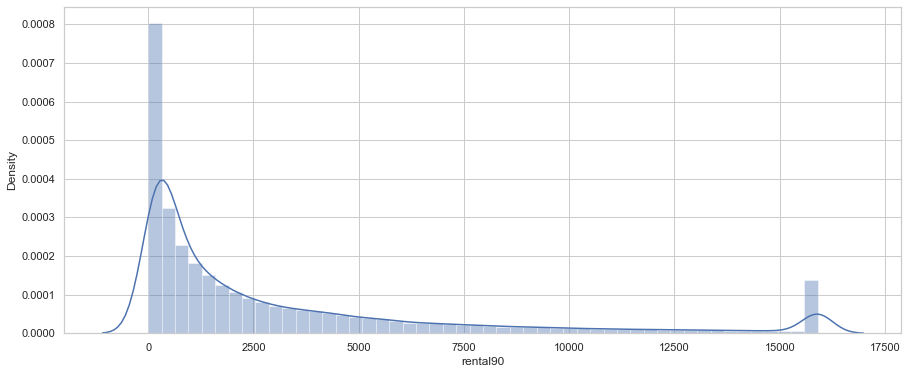

In [286]:
#rental90
outlier_IQR3(df,"rental90")

In [287]:
#outlier_IQR3(df,'last_rech_date_ma')

In [288]:
#outlier_IQR3(df,'last_rech_date_da')

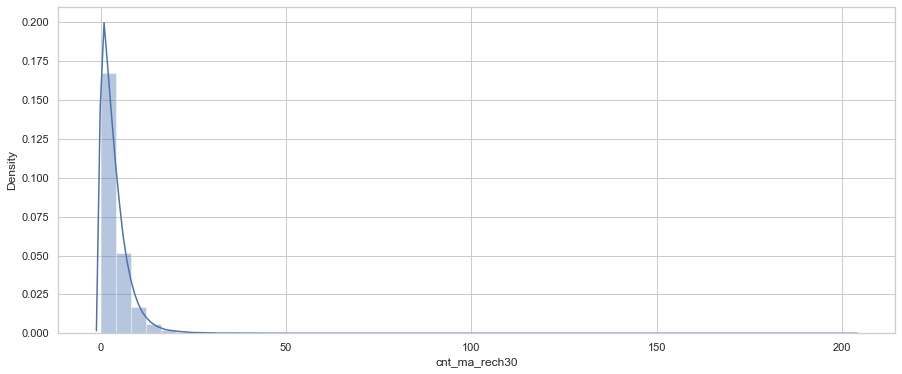

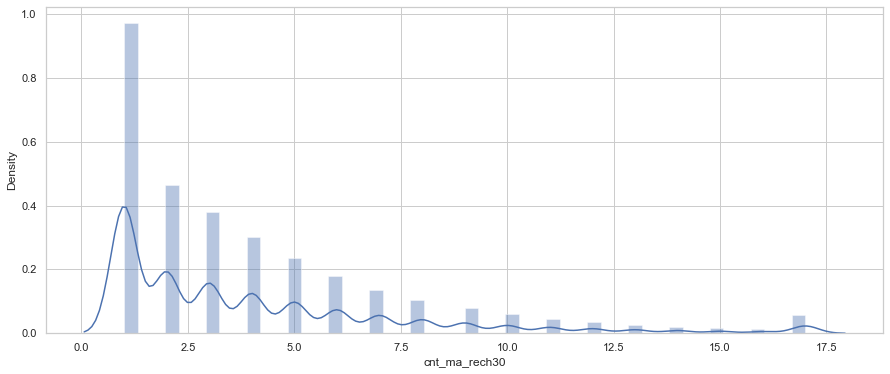

In [289]:
#cnt_ma_rech30
outlier_IQR3(df,'cnt_ma_rech30')

In [290]:
#outlier_IQR3(df,'fr_ma_rech30')

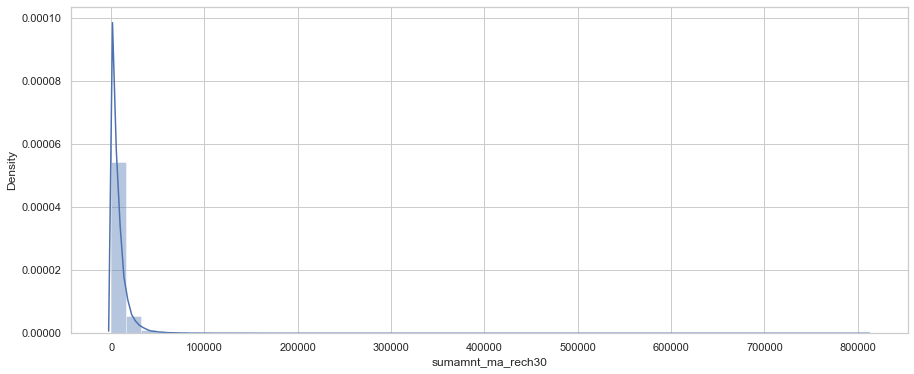

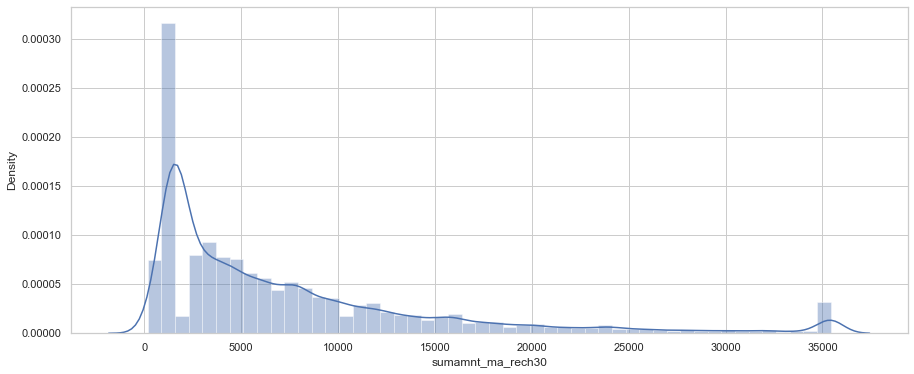

In [291]:
#sumamnt_ma_rech30
outlier_IQR3(df,'sumamnt_ma_rech30')

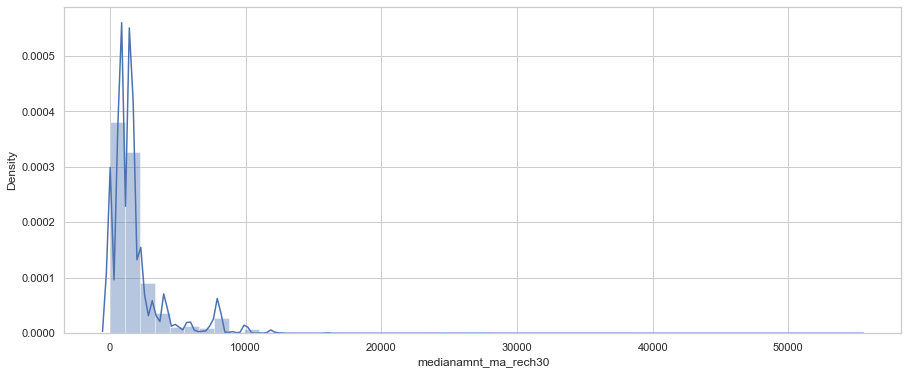

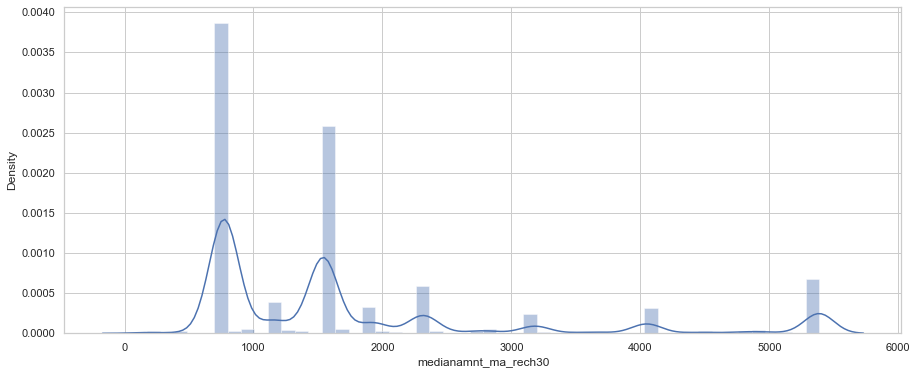

In [292]:
#medianamnt_ma_rech30
outlier_IQR3(df,'medianamnt_ma_rech30')

In [293]:
#outlier_IQR3(df,'medianmarechprebal30')

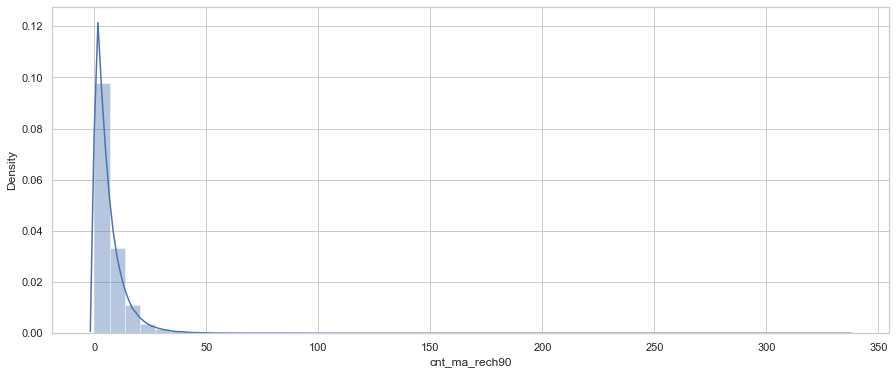

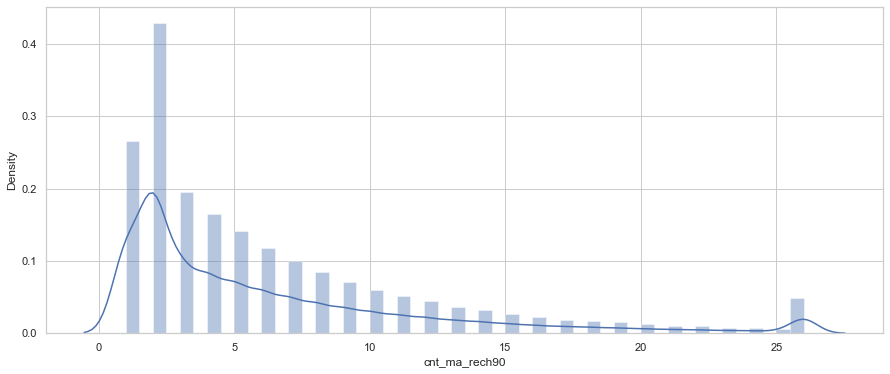

In [294]:
#cnt_ma_rech90
outlier_IQR3(df,'cnt_ma_rech90')

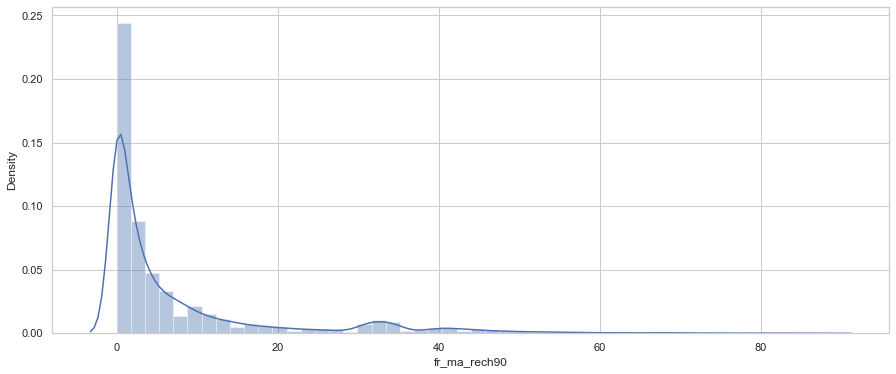

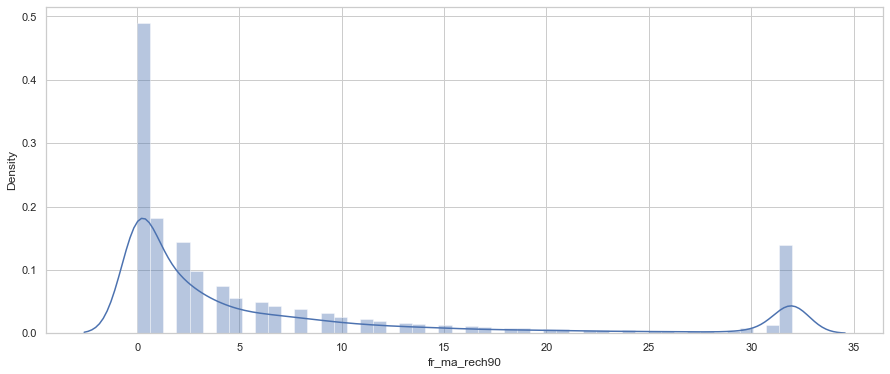

In [295]:
#fr_ma_rech90
outlier_IQR3(df,'fr_ma_rech90')

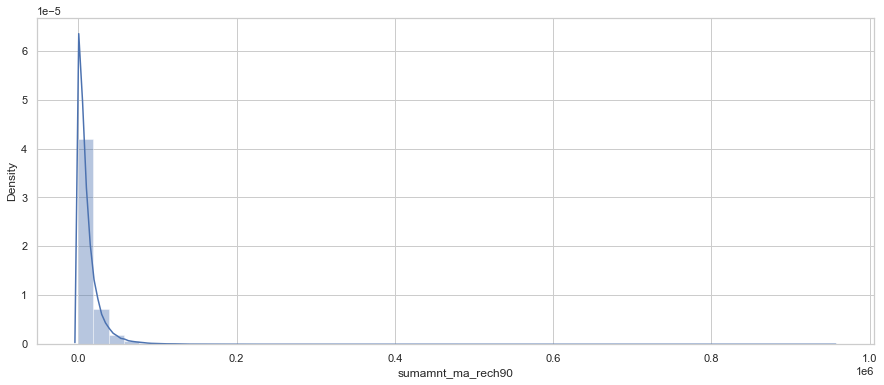

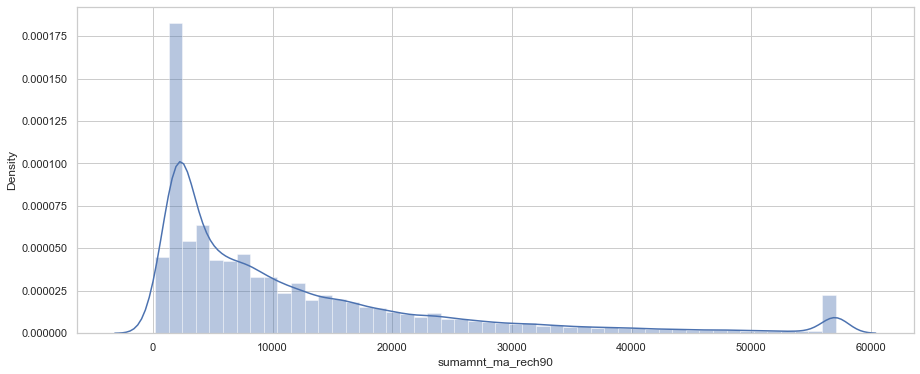

In [296]:
#sumamnt_ma_rech90
outlier_IQR3(df,'sumamnt_ma_rech90')

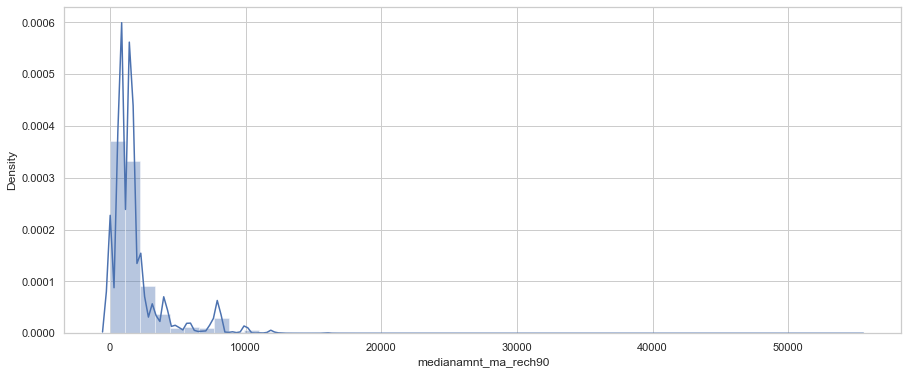

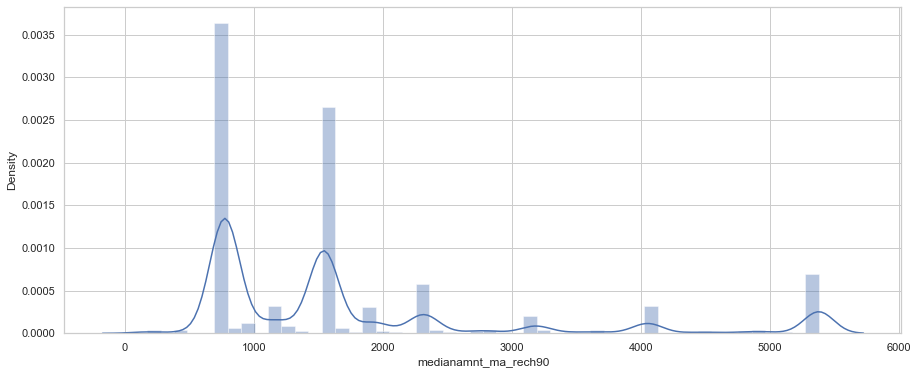

In [297]:
#'medianamnt_ma_rech90
outlier_IQR3(df,'medianamnt_ma_rech90')

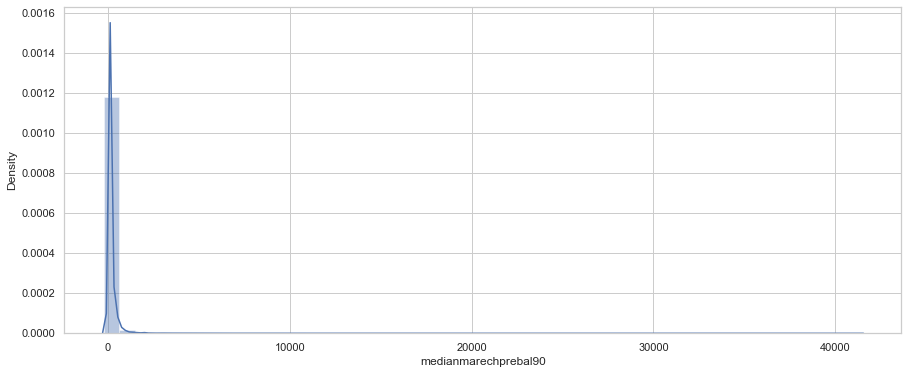

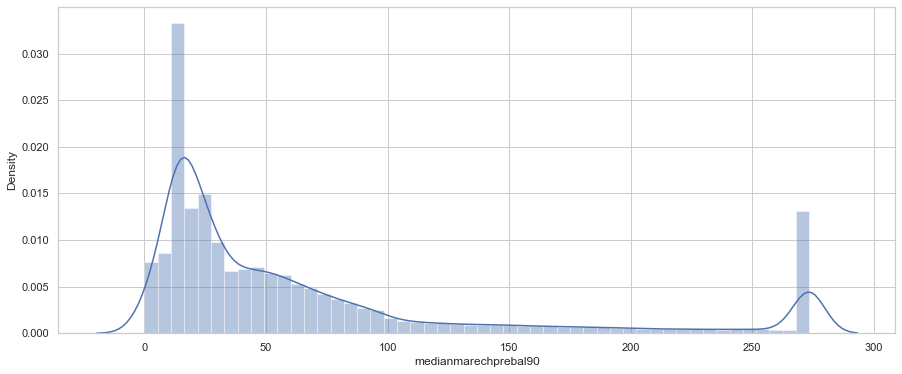

In [298]:
#medianmarechprebal90
outlier_IQR3(df,'medianmarechprebal90')

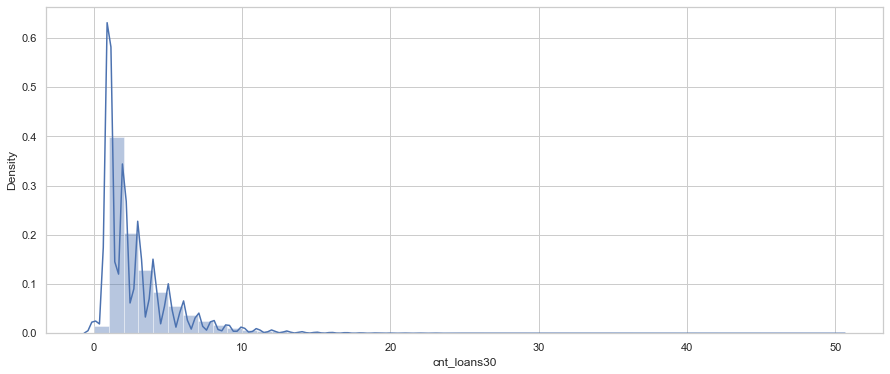

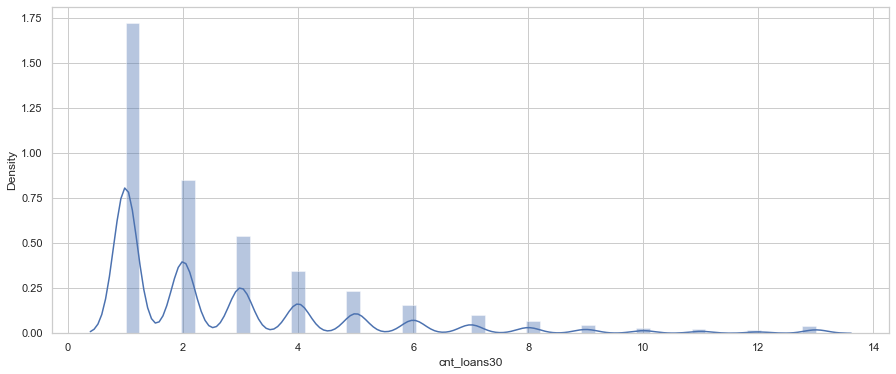

In [299]:
#cnt_loans30
outlier_IQR3(df,'cnt_loans30')

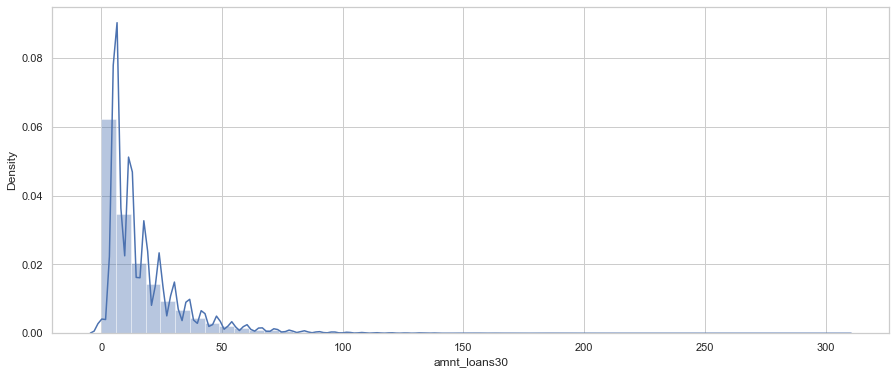

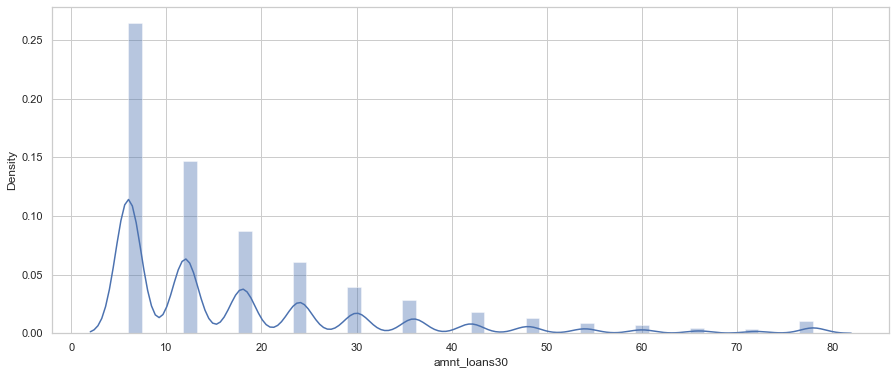

In [300]:
#amnt_loans30
outlier_IQR3(df,'amnt_loans30')

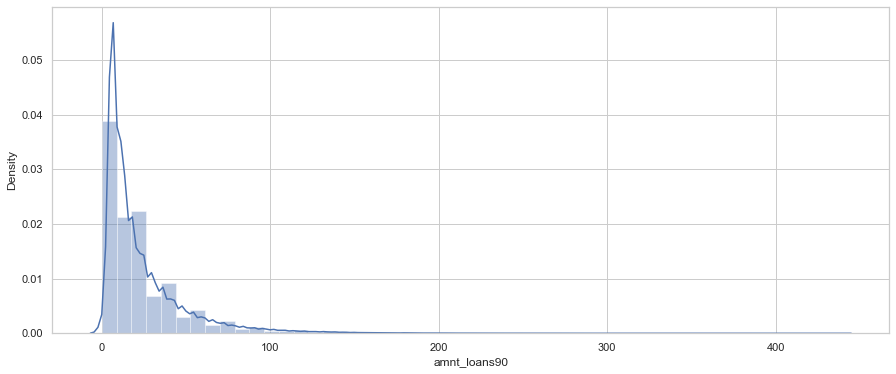

In [301]:
#amnt_loans90
outlier_IQR3(df,'amnt_loans90')

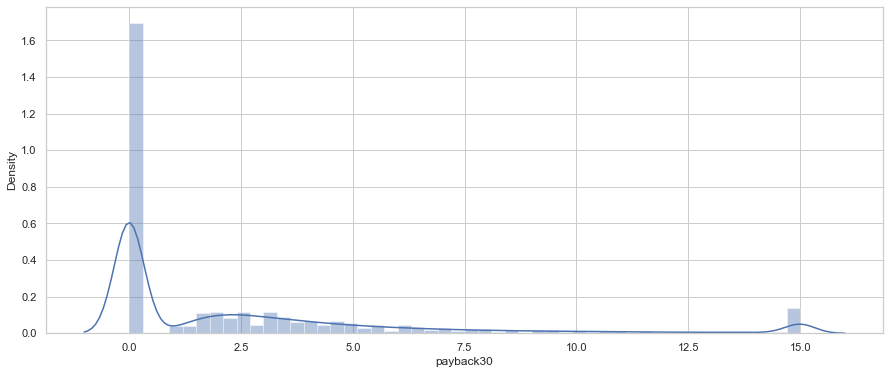

In [302]:
#payback30
outlier_IQR3(df,'payback30')

In [303]:
#payback90
outlier_IQR3(df,'payback90')

In [304]:
#in all the columns we applied IQR3, though it didnt fixed the outliers completely still the values know is very much in range

In [305]:
#checking for skewness
df.skew()

label                  -2.270254
daily_decr30            1.798609
daily_decr90            1.785480
rental30                1.805554
rental90                1.792858
last_rech_amt_ma        3.781149
cnt_ma_rech30           1.643846
sumamnt_ma_rech30       1.819810
medianamnt_ma_rech30    1.706035
cnt_ma_rech90           1.627828
fr_ma_rech90            1.650263
sumamnt_ma_rech90       1.820287
medianamnt_ma_rech90    1.676434
medianmarechprebal90    1.707221
cnt_loans30             1.963809
amnt_loans30            1.876377
medianamnt_loans30      4.551043
amnt_loans90            1.840032
maxamnt_loans90         1.678304
medianamnt_loans90      4.895720
payback30               1.835901
payback90               1.825511
dtype: float64

In [306]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=6,nrows=6, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [307]:
#there are outliers in every column

In [308]:
#spliting the data in X,Y

In [309]:
x=df.drop("label",axis=1 )

In [310]:
x

daily_decr30  daily_decr90  rental30  rental90  last_rech_amt_ma  \
0        3055.050000   3065.150000    220.13    260.13              1539   
1       12122.000000  12124.750000   3691.26   3691.26              5787   
2        1398.000000   1398.000000    900.13    900.13              1539   
3          21.228000     21.228000    159.42    159.42               947   
4         150.619333    150.619333   1098.90   1098.90              2309   
...              ...           ...       ...       ...               ...   
209588    151.872333    151.872333   1089.19   1089.19              4048   
209589     36.936000     36.936000   1728.36   1728.36               773   
209590  11843.111667  11904.350000   5861.83   8893.20              1539   
209591  12488.228333  12574.370000    411.83    984.58               773   
209592   4489.362000   4534.820000    483.92    631.20              7526   

        cnt_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  cnt_ma_rech90  \
0                 2.0             3078.0                1539.0            2.0   
1                 1.0             5787.0                5386.0            1.0   
2                 1.0             1539.0                1539.0            1.0   
3                 1.0             1540.0                 770.0            1.0   
4                 7.0            20029.0                2309.0            8.0   
...               ...                ...                   ...            ...   
209588            3.0            10404.0                3178.0            3.0   
209589            4.0             3092.0                 773.0            6.0   
209590            5.0             9334.0                1539.0           11.0   
209591            5.0            12154.0                 773.0            6.0   
209592            2.0             9065.0                4532.5            3.0   

        fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0               21.0             3078.0                1539.0   
1                0.0             5787.0                5377.0   
2                0.0             1539.0                1539.0   
3                0.0              947.0                 947.0   
4                2.0            23496.0                2888.0   
...              ...                ...                   ...   
209588           2.0            10404.0                3178.0   
209589           2.0             4038.0                 773.0   
209590           5.0            18592.0                1539.0   
209591           4.0            17941.0                2410.5   
209592          19.0            16591.0                5377.0   

        medianmarechprebal90  cnt_loans30  amnt_loans30  medianamnt_loans30  \
0                       7.50          2.0          12.0                 0.0   
1                      61.04          1.0          12.0                 0.0   
2                      66.32          1.0           6.0                 0.0   
3                       2.50          2.0          12.0                 0.0   
4                      35.00          7.0          42.0                 0.0   
...                      ...          ...           ...                 ...   
209588                 91.81          2.0          12.0                 0.0   
209589                111.80          3.0          18.0                 0.0   
209590                 47.13          4.0          42.0                 0.0   
209591                100.00          2.0          18.0                 0.0   
209592                273.44          2.0          18.0                 0.0   

        amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
0               12.0                6                 0.0  15.000000   
1               12.0               12                 0.0   0.000000   
2                6.0                6                 0.0   0.000000   
3               12.0                6                 0.0   0.000000   
4               42.0            

In [311]:
y=df["label"]

In [312]:
y.values.reshape(-1,1)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [313]:
#treating skewness with power transform
from sklearn.preprocessing import power_transform

In [314]:
df_new=power_transform(x)

In [315]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [316]:
df_new.skew()

daily_decr30           -0.121961
daily_decr90           -0.114958
rental30               -0.038365
rental90               -0.044532
last_rech_amt_ma       -0.061262
cnt_ma_rech30           0.119123
sumamnt_ma_rech30       0.004360
medianamnt_ma_rech30   -0.010721
cnt_ma_rech90           0.071439
fr_ma_rech90            0.128961
sumamnt_ma_rech90      -0.010546
medianamnt_ma_rech90   -0.023398
medianmarechprebal90   -0.001181
cnt_loans30             0.232485
amnt_loans30            0.155074
medianamnt_loans30      3.447735
amnt_loans90            0.133935
maxamnt_loans90         0.364282
medianamnt_loans90      3.779598
payback30               0.275168
payback90               0.182777
dtype: float64

In [317]:
#The skewness is in range of-0.5 to 0.5 except medianamnt_loans30 & medianamnt_loans90. there need no correction, since the maximum values are zero an dfew are 3

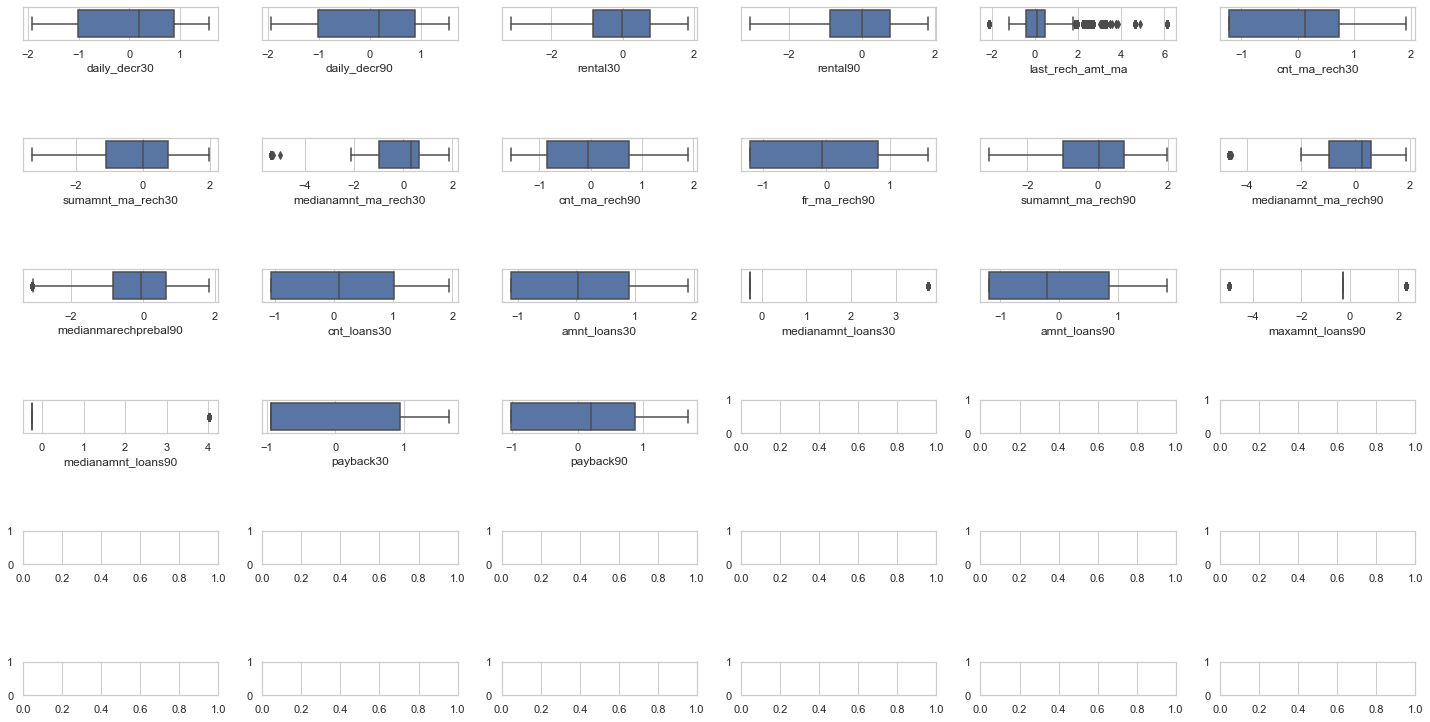

In [318]:
#ploting boxplot to check the outliers
fig, ax=plt.subplots(ncols=6,nrows=6, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df_new.items():
    if col != "type":
        sns.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

In [319]:
#there are relatively less outliers than before

In [320]:
x=df_new

<AxesSubplot:xlabel='label', ylabel='count'>

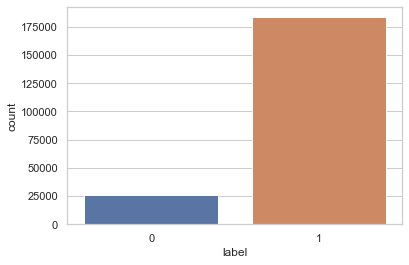

In [321]:
#the dependent varible is unbalenced
sns.countplot(y)

In [322]:
#using upsampling to balance the data
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
#data transformation
x,y = oversample.fit_resample(x,y)

In [323]:
sns.countplot(y)

<AxesSubplot:xlabel='label', ylabel='count'>

In [324]:
#the dependent data is balenced now

In [325]:
#importing neccesary library for model building and performance check


In [326]:
#spliting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30, random_state=56)

In [327]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((256803, 21), (110059, 21), (256803,), (110059,))

In [328]:
# function to train, test and performance check 
def model(name):
    model=name()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print("""The classification report is:
    """,classification_report(y_test, predict))
       
    print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
    print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))
    

In [329]:
#DecisionTreeClassifier
model(DecisionTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.87      0.89      0.88     55238
           1       0.89      0.86      0.88     54821

    accuracy                           0.88    110059
   macro avg       0.88      0.88      0.88    110059
weighted avg       0.88      0.88      0.88    110059

The accuracy score is:  0.8779291107496888
The confusion matrix is:
    
     [[49229  6009]
 [ 7426 47395]]


In [330]:
# the accuracy score here is ~87 percent

In [331]:
#RandomForestClassifier
model(RandomForestClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.93      0.94      0.93     55238
           1       0.94      0.93      0.93     54821

    accuracy                           0.93    110059
   macro avg       0.93      0.93      0.93    110059
weighted avg       0.93      0.93      0.93    110059

The accuracy score is:  0.9325543572084064
The confusion matrix is:
    
     [[51704  3534]
 [ 3889 50932]]


In [332]:
#The accuracy score here is ~93 percent

In [333]:
#GaussianNB
model(GaussianNB)

The classification report is:
                   precision    recall  f1-score   support

           0       0.73      0.79      0.76     55238
           1       0.77      0.71      0.74     54821

    accuracy                           0.75    110059
   macro avg       0.75      0.75      0.75    110059
weighted avg       0.75      0.75      0.75    110059

The accuracy score is:  0.7508063856658701
The confusion matrix is:
    
     [[43633 11605]
 [15821 39000]]


In [334]:
#The accuracy score here is ~74 percent

In [335]:
#KNN
model(KNeighborsClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.97      0.89     55238
           1       0.96      0.79      0.87     54821

    accuracy                           0.88    110059
   macro avg       0.89      0.88      0.88    110059
weighted avg       0.89      0.88      0.88    110059

The accuracy score is:  0.879055779172989
The confusion matrix is:
    
     [[53652  1586]
 [11725 43096]]


In [336]:
#The accuracy score here is ~87 percent

In [337]:
#ExtraTreeClassifier
model(ExtraTreeClassifier)

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.88      0.86     55238
           1       0.88      0.84      0.86     54821

    accuracy                           0.86    110059
   macro avg       0.86      0.86      0.86    110059
weighted avg       0.86      0.86      0.86    110059

The accuracy score is:  0.8614016118627281
The confusion matrix is:
    
     [[48742  6496]
 [ 8758 46063]]


In [338]:
#The accuracy score here is ~86 percent

In [339]:
#Crossvalidation

In [340]:
#DTC
print(cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean())

0.8834576521556636


In [341]:
#RFC
print(cross_val_score(RandomForestClassifier(),x,y,cv=5).mean())

0.9337708778562321


In [342]:
#Naive Bayes
print(cross_val_score(GaussianNB(),x,y,cv=5).mean())

0.7491345508237413


In [343]:
#ETC
print(cross_val_score(ExtraTreeClassifier(),x,y,cv=5).mean())

0.8715321348346995


In [344]:
#The models with the highest accuracy and very least error with the corssvalidation score is RandomForestCLassifier, DecisionTreeClassifeir & ExtraTreeClassifier

In [345]:
#Doing hyperparameter tuning on thses two models

In [346]:
#setting the parameter

In [347]:
parameter={"max_depth":np.arange(2,10),
          "criterion":["gini","entropy"]}

In [348]:
#using GridSearchCV for tuning

In [349]:
#RandomForestClassifier
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [350]:
#best parameters
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [378]:
#consturucting model on best parameter
rtc=RandomForestClassifier(criterion="gini", max_depth=9)

In [379]:
rtc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9)

In [380]:
predict=rtc.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

The classification report is:
                   precision    recall  f1-score   support

           0       0.82      0.86      0.84     55238
           1       0.85      0.82      0.83     54821

    accuracy                           0.84    110059
   macro avg       0.84      0.84      0.84    110059
weighted avg       0.84      0.84      0.84    110059

The accuracy score is:  0.8356336146975712
The confusion matrix is:
    
     [[47261  7977]
 [10113 44708]]


In [354]:
#by applying the best parameter the accuracy is less than the default parameter in RandomForestClassifier

In [355]:
#Decision Tree tunning

In [356]:
gcv=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [357]:
#best parameter
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [358]:
#applying best parameter
dtc=DecisionTreeClassifier(criterion="entropy", max_depth=9)

In [359]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [360]:
predict=dtc.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.81      0.83     55238
           1       0.82      0.86      0.84     54821

    accuracy                           0.83    110059
   macro avg       0.83      0.83      0.83    110059
weighted avg       0.83      0.83      0.83    110059

The accuracy score is:  0.8329078039960385
The confusion matrix is:
    
     [[44772 10466]
 [ 7924 46897]]


In [361]:
#by applying the best parameter the accuracy is less than the default parameter in DecisionClassifier

In [362]:
#applying GridsearchCV on ExtraTreeClassifier
gcv=GridSearchCV(ExtraTreeClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [363]:
#best parameter
gcv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [364]:
#buliting ETC model with best parameter
etc=ExtraTreeClassifier(criterion="entropy", max_depth=9)

In [365]:
etc.fit(x_train,y_train)

ExtraTreeClassifier(criterion='entropy', max_depth=9)

In [366]:
predict=dtc.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

The classification report is:
                   precision    recall  f1-score   support

           0       0.85      0.81      0.83     55238
           1       0.82      0.86      0.84     54821

    accuracy                           0.83    110059
   macro avg       0.83      0.83      0.83    110059
weighted avg       0.83      0.83      0.83    110059

The accuracy score is:  0.8329078039960385
The confusion matrix is:
    
     [[44772 10466]
 [ 7924 46897]]


In [367]:
#by applying the best parameter the accuracy is less than the default parameter in ExtraTreeClassifier

In [368]:
#hence the best model is RandomForestClassifier with default parameter with the accuracy of ~93 percent

In [369]:
#Building Final Model with RandomTreeClassifier

In [371]:
best_model=RandomForestClassifier()
best_model.fit(x_train,y_train)
predict=best_model.predict(x_test)
print("""The classification report is:
    """,classification_report(y_test, predict))
       
print("The accuracy score is: ", accuracy_score(y_test,predict))
    
    
print("""The confusion matrix is:
    
    """,confusion_matrix(y_test,predict))

The classification report is:
                   precision    recall  f1-score   support

           0       0.93      0.94      0.93     55238
           1       0.93      0.93      0.93     54821

    accuracy                           0.93    110059
   macro avg       0.93      0.93      0.93    110059
weighted avg       0.93      0.93      0.93    110059

The accuracy score is:  0.9320818833534741
The confusion matrix is:
    
     [[51671  3567]
 [ 3908 50913]]


In [375]:
#savingThemodel

In [377]:
import joblib
joblib.dump(best_model,"Telecom Prediction Final.pkl")

['Telecom Prediction Final.pkl']